In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'C:\\Users\\bhard\\OneDrive\\Desktop\\project 1\\datascience\\Iris.csv'
df = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Check for any missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Features and labels
X = df.drop(columns=['Id', 'Species'])  # Drop the Id and Species columns
y = df['Species']  # Target label

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


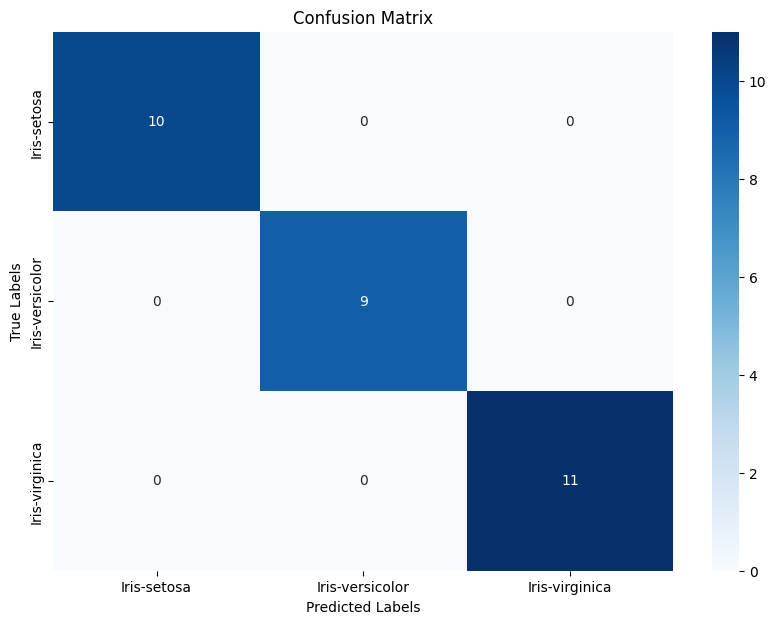

In [13]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Plot Feature Importance
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

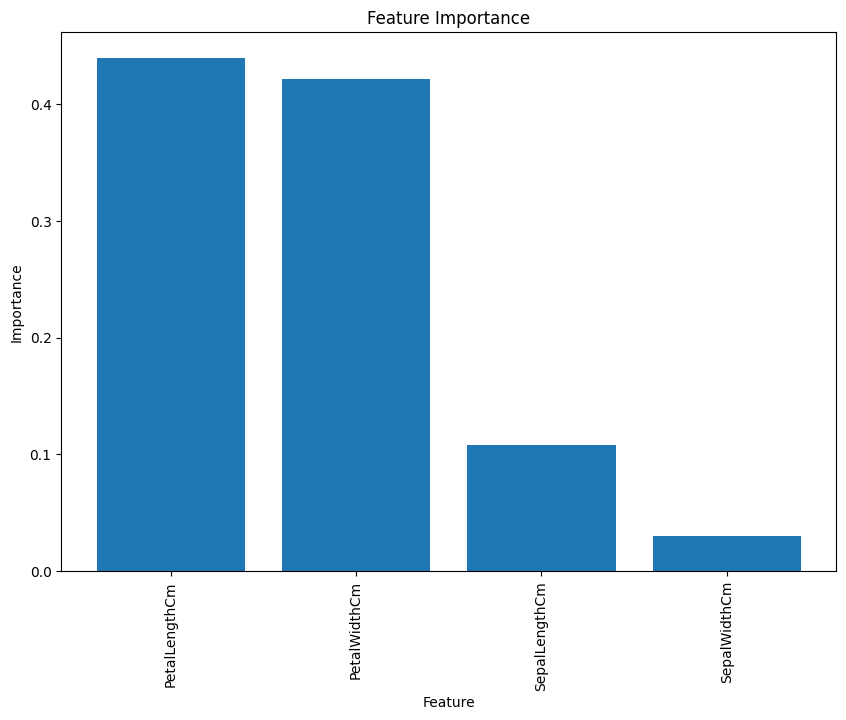

In [15]:
plt.figure(figsize=(10, 7))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

<Figure size 1000x700 with 0 Axes>

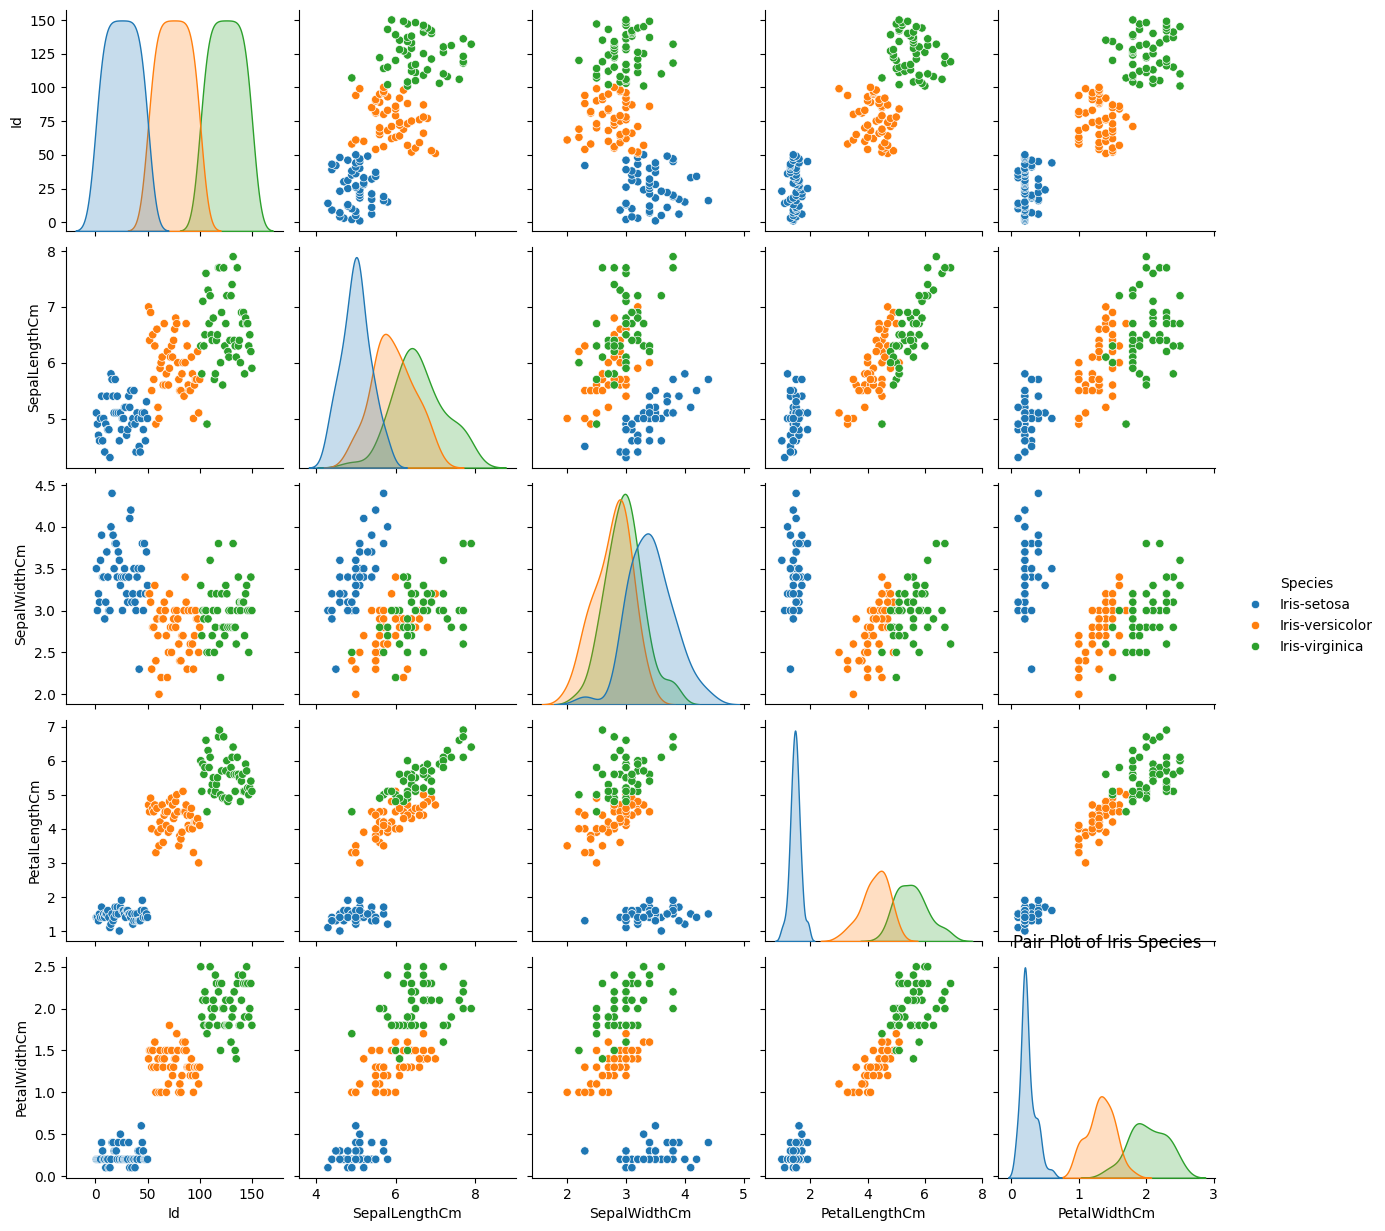

In [16]:
# Optional: Plot Pair Plot for feature distribution
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.pairplot(df, hue='Species')
plt.title('Pair Plot of Iris Species')
plt.show()
